In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# **Telco Churn Prediction**

Customer churn, also known as customer attrition, is when a customer chooses to stop using your products or services. With each customer who churns, there are usually early indicators that could have been uncovered with churn analysis.

In [31]:
# Import libraries we'll need

import numpy as np 
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

# **Get the data**
Data obtained from https://www.kaggle.com/blastchar/telco-customer-churn

In [32]:
df=pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Cleaning and Understanding the data**
We now try to understand the data we are dealing with

In [33]:
# data types for all fields
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# **View the unique data by column.**
There are a few columns we can convert to binary.

In [34]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [35]:
# print each item in df cols, see item.unique()
# gives an idea which can be converted to binary
for item in df.columns:
    print(item)
    print (df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

# **convert strings to lowercase.**
all strings to lower case in cols fields

In [36]:
# convert colsname to lower case, throw exception couldnt convert
for item in df.columns:
    try:
        df[item] = df[item].str.lower()
    except:
        print(item, "couldn't convert")
df.head()

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


# **Convert all yes and no to 0's & 1's so our classifier can use this data.**
all cols with value yes or no, convert to 0 or 1 respectively

In [37]:
# list columns to convert
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='yes', value=1, inplace=True)
    df[item].replace(to_replace='no',  value=0, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,...,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,...,yes,no,no,no,one year,0,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,...,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,...,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,...,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [38]:
# see data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

# **Check for NULLs**

In [39]:
# check for null values on cols
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# **We can see TotalCharges is still an object. Change TotalCharges to be float.**

In [40]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [41]:
# convert all entries for totalcharges field to numerics
# replace blanks with np.nan
#df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [42]:
# check for null values on cols
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [43]:
#mean of TotalCharges
df['TotalCharges'].mean()

2283.3004408418656

In [44]:
#replacing the missing values in TotalCharges by mean of the cloumn
df['TotalCharges'].fillna(df['TotalCharges'].mean())
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [45]:
# check for null values on cols
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# **Balance the labels so we have the same number of non-churners as churners.**

In [46]:
churners_number = len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df[df['Churn'] == 1])

non_churners = df[df['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df2 = churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


# **Classifier**
Are there any strong correlations?

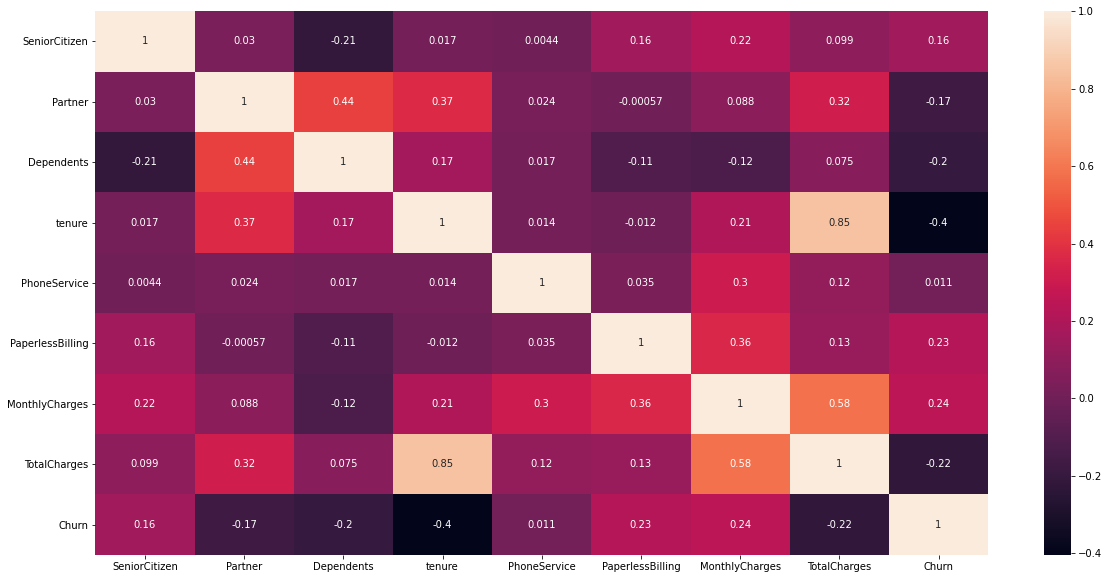

In [47]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df2,show_chart=True)

# **Dropping Cutomer ID Column**

In [48]:
#dropping customerID to build a classifier
df2.drop('customerID',axis=1,inplace=True)

In [49]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
4,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1
5,female,0,0,0,8,1,yes,fiber optic,no,no,yes,no,yes,yes,month-to-month,1,electronic check,99.65,820.50,1
8,female,0,1,0,28,1,yes,fiber optic,no,no,yes,yes,yes,yes,month-to-month,1,electronic check,104.80,3046.05,1
13,male,0,0,0,49,1,yes,fiber optic,no,yes,yes,no,yes,yes,month-to-month,1,bank transfer (automatic),103.70,5036.30,1


# **Use one-hot encoding to convert categorical data to binary (0 or 1)**

In [50]:
# get_dummies
ml_dummies = pd.get_dummies(df2)
ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,...,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,99.65,820.50,1,1,...,0,0,1,1,0,0,0,0,1,0
8,0,1,0,28,1,1,104.80,3046.05,1,1,...,0,0,1,1,0,0,0,0,1,0
13,0,0,0,49,1,1,103.70,5036.30,1,0,...,0,0,1,1,0,0,1,0,0,0


In [51]:
# sort values
show_correlations(ml_dummies, show_chart=False)["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_month-to-month                    0.476543
OnlineSecurity_no                          0.401605
TechSupport_no                             0.388368
InternetService_fiber optic                0.357577
PaymentMethod_electronic check             0.327782
OnlineBackup_no                            0.304475
DeviceProtection_no                        0.285196
MonthlyCharges                             0.244971
PaperlessBilling                           0.226342
SeniorCitizen                              0.156623
StreamingTV_no                             0.151894
StreamingMovies_no                         0.149226
StreamingMovies_yes                        0.080885
StreamingTV_yes                            0.078179
MultipleLines_yes                          0.055158
PhoneService                               0.010992
gender_female                              0.007491
gender_male                               -0.007491
MultipleLine

<Figure size 1440x720 with 0 Axes>

In [52]:
# remove the label before training
try:
    label = ml_dummies['Churn'] # Remove the label before training the model
    del ml_dummies['Churn']
except:
    print("label already removed.")

# **Using KNeighborsClassifier and DecisionTreeClassifier**
from sklearn.tree import DecisionTreeClassifier

KNeighborsClassifier
0.68 
 - - - - -  

DecisionTreeClassifier
0.734 
 - - - - -  



<AxesSubplot:ylabel='features'>

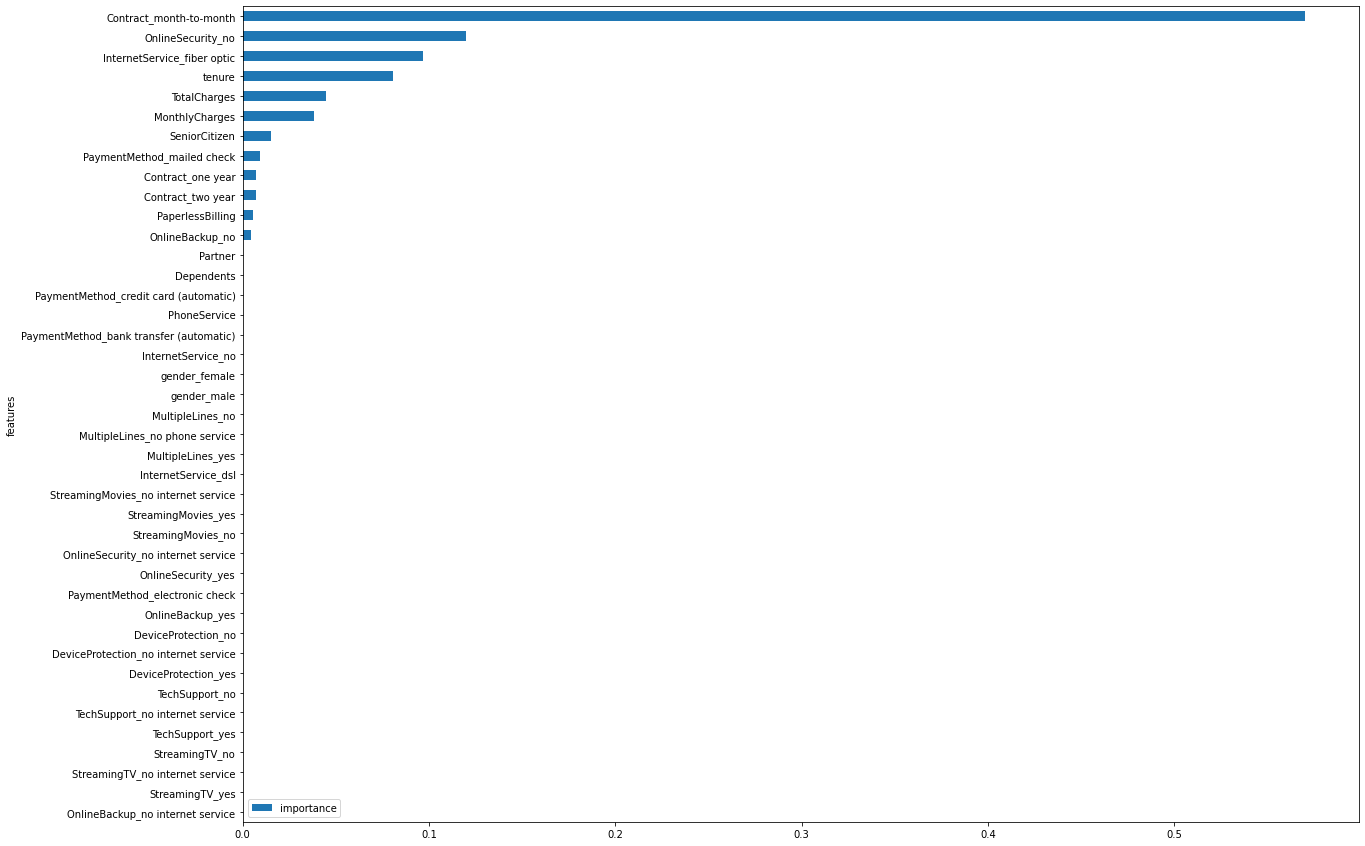

In [53]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(ml_dummies, label, test_size=0.3)

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = ml_dummies.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

# **Confusion Matrix**
Plot the confusion matrix, with some non-normalized matrix

Confusion matrix, without normalization
[[387 157]
 [141 437]]
Normalized confusion matrix
[[0.71 0.29]
 [0.24 0.76]]


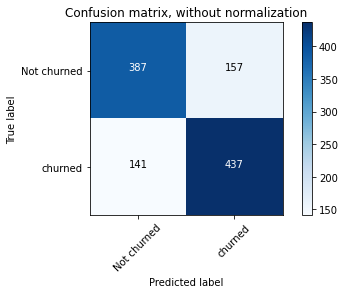

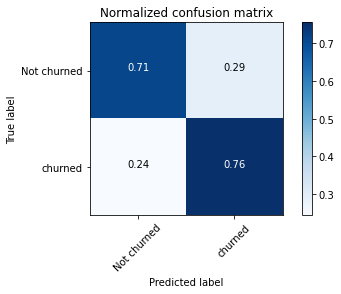

              precision    recall  f1-score   support

 Not churned       0.73      0.71      0.72       544
     churned       0.74      0.76      0.75       578

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122



In [54]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(label_test, pred, target_names=class_names)
print(eval_metrics)

From the matrix above we can see that if we do not normnalized, we predicted that 425 people are going to churn and indeed 425 customers churned. 

# **Digging some more on the results**
This result seems conservative. We're more likely to say someone is going to churn when they're not vs predicting someone's not going to churn when they do.

# **Make predictions on the dataset**

In [59]:
# Preprocessing original dataframe
def preprocess_df(dataframe):
    x = dataframe.copy()
    try:
        customer_id = x['customerID']
        del x['customerID'] # Don't need in ML DF
    except:
        print("already removed customerID")
    ml_dummies = pd.get_dummies(x)
    ml_dummies.fillna(value=0, inplace=True)

    # import random done above
    #ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

    try:
        label = ml_dummies['Churn']
        del ml_dummies['Churn']
    except:
        print("label already removed.")
    return ml_dummies, customer_id, label

original_df = preprocess_df(df)

In [64]:
output_df = original_df[0].copy()
output_df['prediction'] = clf.predict_proba(output_df)[:,1]
output_df['churn'] = original_df[2]
output_df['customerID'] = original_df[1]
print(output_df['prediction'])
print(output_df['customerID'])

0       0.754717
1       0.227273
2       0.444934
3       0.024242
4       0.928571
          ...   
7038    0.227273
7039    0.161290
7040    0.444934
7041    0.613636
7042    0.170732
Name: prediction, Length: 7043, dtype: float64
0       7590-vhveg
1       5575-gnvde
2       3668-qpybk
3       7795-cfocw
4       9237-hqitu
           ...    
7038    6840-resvb
7039    2234-xaduh
7040    4801-jzazl
7041    8361-ltmkd
7042    3186-ajiek
Name: customerID, Length: 7043, dtype: object


In [61]:
print('Mean predict proba of churn:',round(output_df[output_df['churn'] == 1]['prediction'].mean(),2))

print('Mean predict proba of NON-churn:',round(output_df[output_df['churn'] == 0]['prediction'].mean(),2))

Mean predict proba of churn: 0.69
Mean predict proba of NON-churn: 0.32


# **Use this next dataframe for activation.** 
Using media, let's target the customers who haven't churned but are likely to.

In [65]:
# activate
activate = output_df[output_df['churn'] == 0]
activate[['customerID','prediction']]

,customerID,prediction
0,7590-vhveg,0.754717
1,5575-gnvde,0.227273
3,7795-cfocw,0.024242
6,1452-kiovk,0.795620
7,6713-okomc,0.444934
...,...,...
7037,2569-wgero,0.024242
7038,6840-resvb,0.227273
7039,2234-xaduh,0.161290
7040,4801-jzazl,0.444934


In [67]:
churn_val=activate[['customerID','prediction']]
churn_val

,customerID,prediction
0,7590-vhveg,0.754717
1,5575-gnvde,0.227273
3,7795-cfocw,0.024242
6,1452-kiovk,0.795620
7,6713-okomc,0.444934
...,...,...
7037,2569-wgero,0.024242
7038,6840-resvb,0.227273
7039,2234-xaduh,0.161290
7040,4801-jzazl,0.444934


In [ ]:
pip install dash

In [ ]:
import dash_core_components as dcc
import dash_html_components as html
import dash
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

ALLOWED_TYPES = (
    "text", "number", "password", "email", "search",
    "tel", "url", "range", "hidden",
)


app.layout = html.Div(
    [
        dcc.Input(
            id="input_{}".format(_),
            type=_,
            placeholder="input type {}".format(_),
        )
        for _ in ALLOWED_TYPES
    ]
    + [html.Div(id="out-all-types")]
)


@app.callback(
    Output("out-all-types", "children"),
    [Input("input_{}".format(_), "value") for _ in ALLOWED_TYPES],
)
def cb_render(*vals):
    return " | ".join((str(val) for val in vals if val))


if __name__ == "__main__":
    app.run_server(debug=True)

In [ ]:
activate.head(20)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(activate['prediction'])

In [ ]:
#checking lower quatile and upper quartile
Q1 = activate['prediction'].quantile(0.25)
Q3 = activate['prediction'].quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
print(Q1)
print(Q3)

****

In [ ]:
#checking how many customers are more likily to churn. That is how many customers are above Q3
k=0.5
count=0
for i in activate['prediction']:
    if i>k:
        count=count+1
       # print("The number greater than .5: "+ str(count))
count

**There are 1593 customers that are likely to churn. The chance for these customers to churn are very high, therefore we need to make foolow ups on how we can make them not to churn**

In [ ]:
k=0.07
count=0
for i in activate['prediction']:
    if i>=k:
        count=count+1
       # print("The number greater than .5: "+ str(count))
count

**For about 3312 customer want to stay with us but on the other hand they are not happy with our service and that make them to move out.**

In [ ]:
high_churn=[]
low_churn=[]
moderate_churn=[]

for 